In [6]:
%matplotlib tk
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

In [7]:
im1 = np.array(Image.open("assets/face1.jpg"))
im2 = np.array(Image.open("assets/face2.jpg"))

In [10]:
def get_input_lines(im1, im2):
    """
    Allows user to input key points

    Returns:
        n: number of keypoints
        keypoints: np.ndarray of shape (n,4) in format of x1,y1,x2,y2 
    """
    n = 0
    keypoints = []
    
    h1,w1,_ = im1.shape
    h2,w2,_ = im2.shape
    im_combine = np.hstack((im1, im2))

    plt.figure()
    plt.imshow(im_combine)
    plt.show()

    while True:
        clicked = plt.ginput(2, timeout=0, show_clicks=True)
        
        if not clicked or len(clicked) < 2:
            break

        keypoints.append([clicked[0][0], clicked[0][1], clicked[1][0]-w1, clicked[1][1]]) # -w1 to offset im1

        c = np.random.rand(3,)
        plt.scatter(clicked[0][0], clicked[0][1], color=c)
        plt.scatter(clicked[1][0], clicked[1][1], color=c)
        n += 1
        
    keypoints = keypoints + [[0,0,0,0], [w1,0,w2,0], [0,h1,0,h2], [w1,h1,w2,h2]] # add 4 corners
    
    plt.close()

    return n, np.array(keypoints, dtype=int)

In [14]:
def display_img_kp(im, kps):
    
    """
    Display image along with keypoints
    """
    
    plt.imshow(im)
    for kp in kps:
        plt.scatter(kp[0], kp[1], color='b')
    plt.show()
    

In [12]:
n, keypoints = get_input_lines(im1, im2)

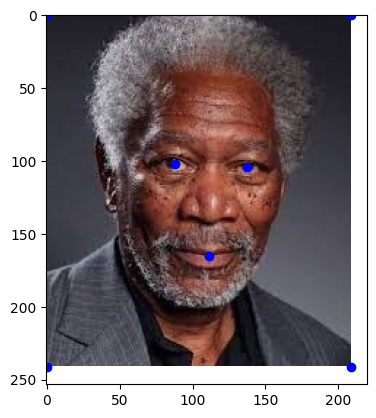

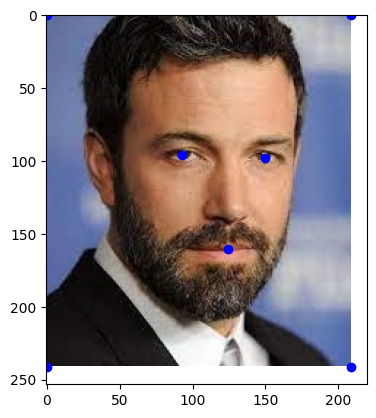

In [15]:
%matplotlib inline
display_img_kp(im1, keypoints[:, :2])
display_img_kp(im2, keypoints[:, 2:])

In [ ]:
plt.imshow(im1)
plt.show()